In [ ]:
install.packages('ggfortify')
install.packages('ca')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(ggfortify)
library(ca)

In [ ]:
poetry <- read_delim("poetry_last_in_lines.csv")

Rows: 364 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): UPoS, LineText, Author
dbl (3): Decade, RhymedNwords, RhymedNsyl

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Пользуясь переменными Decade и UPoS, постройте таблицу сопряженности и визуализируйте связь между декадами и частями речи. Какая кумулятивная объясненная дисперсия у визуализации по Dim1 и Dim2?

In [ ]:
poetry_table <- poetry %>%
  select(Decade, UPoS) %>%
  table()
poetry_df <- data.frame(poetry_table)
head(poetry_df)

,Decade,UPoS,Freq
,<fct>,<fct>,<int>
1,1820,ADJ,12
2,1920,ADJ,40
3,1820,ADP,0
4,1920,ADP,1
5,1820,ADV,5
6,1920,ADV,11


In [ ]:
poetry_table

      UPoS
Decade ADJ ADP ADV DET INTJ NOUN NUM PART PRON VERB   X
  1820  12   0   5   3    0   49   0    0    3   15   0
  1920  40   1  11   3    1  173   3    2    3   39   1

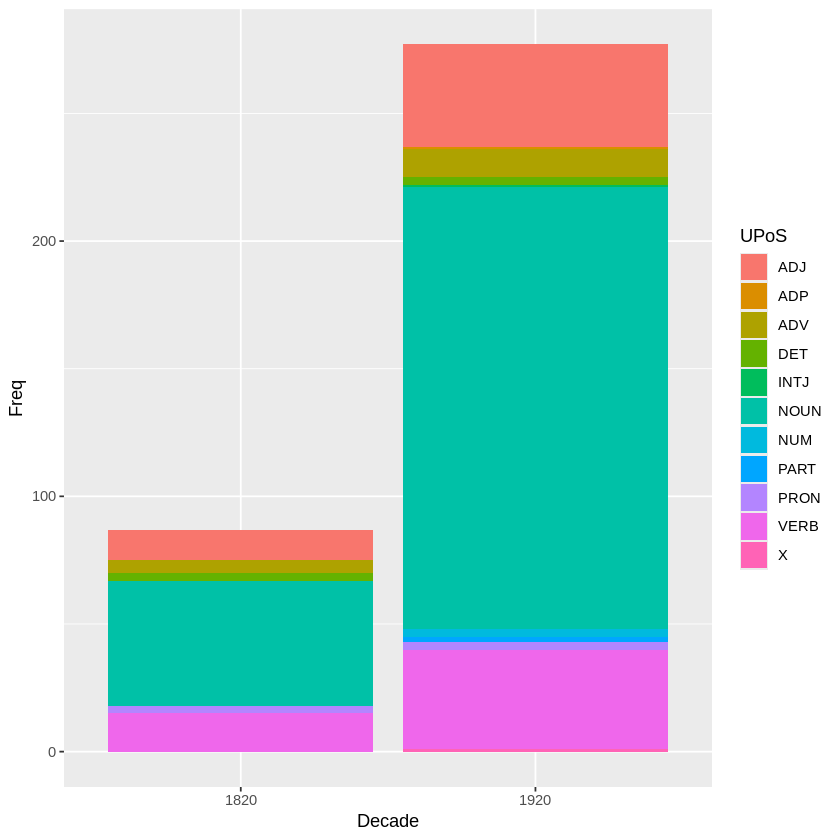

In [ ]:
poetry_df %>%
  ggplot(aes(x=Decade, y=Freq, fill=UPoS)) +
  geom_col()

In [ ]:
poetry_wide_decades <- poetry_df %>%
  pivot_wider(names_from = Decade, values_from = Freq, values_fill=0)
poetry_wide_decades <- poetry_wide_decades %>%
  select(`1820`, `1920`)
poetry_wide_decades

1820,1920
<int>,<int>
12,40
0,1
5,11
3,3
0,1
49,173
0,3
0,2
3,3


In [ ]:
pca_result <- prcomp(poetry_wide_decades)
summary(pca_result)

Importance of components:
                           PC1     PC2
Standard deviation     53.2285 1.47584
Proportion of Variance  0.9992 0.00077
Cumulative Proportion   0.9992 1.00000

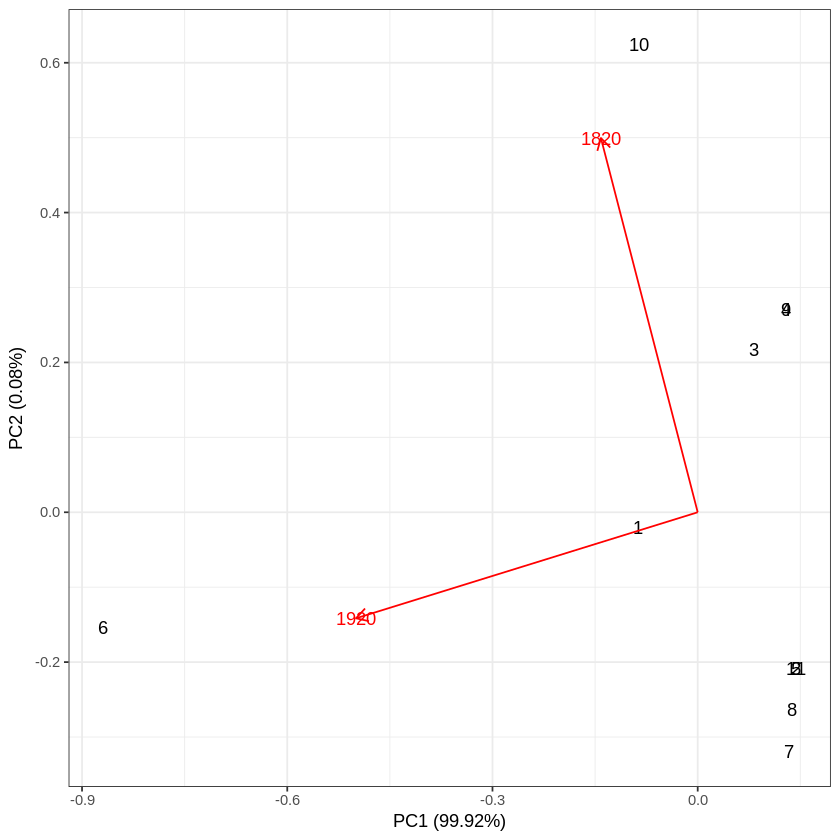

In [ ]:
autoplot(pca_result,
         shape = FALSE,
         loadings = TRUE,
         label = TRUE,
         loadings.label = TRUE)+
  theme_bw()

Проанализируйте визуализацию и напишите (в личку) ваши выводы, касающиеся ассоциации между временем и употреблением частей речи в зоне рифмовке (макс. 5 интересных как положительных, так и нейтральных и отрицательных ассоциаций)

In [ ]:
poetry_long <- data.frame(poetry_table)

poetry_wide <- poetry_long %>%
  pivot_wider(
    names_from = Decade,
    values_from = Freq,
    values_fill = 0
  ) %>%
  column_to_rownames("UPoS")
poetry_wide <- poetry_wide[, colSums(poetry_wide) > 0]